In [1]:
import os

# List files in the '/content' directory or any mounted drive
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/gce
/content/.config/logs/2024.11.25/19.12.20.690274.log
/content/.config/logs/2024.11.25/19.13.09.316504.log
/content/.config/logs/2024.11.25/19.12.55.136430.log
/content/.config/logs/2024.11.25/19.12.56.407212.log
/content/.config/logs/2024.11.25/19.12.42.183555.log
/content/.config/logs/2024.11.25/19.13.10.119162.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import transformers
import tensorflow as tf
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from transformers import GPT2Tokenizer
from transformers import TFGPT2LMHeadModel
from transformers import create_optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import os
import wandb

# IndoQA

In [4]:
from datasets import load_dataset
df_indoqa_train = load_dataset("jakartaresearch/indoqa", split='train')
df_indoqa_train = df_indoqa_train.to_pandas()
df_indoqa_train.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.99k [00:00<?, ?B/s]

indoqa.py:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/466k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3309 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1104 [00:00<?, ? examples/s]

,id,context,question,answer,category,span_start,span_end
0,629HsNl5Qf3THUq_CbmFrSx28,"Para pemuda pejuang, termasuk Chaerul Saleh, S...","Dengan siapa Chaerul Saleh, Sukarni, Wikana, d...",Ibrahim gelar Datuk Tan Malaka,SPAN,128,158
1,2648F832Z8D-thJnrxy_ZoZ11111,Malaysia terdiri atas dua kawasan utama yang t...,Kapan angin muson timur laut berhembus?,Oktober hingga Februari,SPAN,430,453
2,2561YDPNx6Nm5o6T0F-PGw-u2466,"Pada 16 Februari 1830, Diponegoro setuju untuk...",Siapa yang diutus oleh Jendral De Kock yang be...,Kolonel Jan Baptist Clereens,SPAN,93,121
3,1431C0_ORK0ta8pDX6H-1VOp596,Kerajaan Buddhis Ligor segera kembali mengenda...,Apa yang chandrabanu lakukan setelah menguasai...,menggunakan tempat ini sebagai basis untuk men...,SPAN,82,144
4,1234WIzl7ElikCCPk4gA-7ua3057,Sikap terhadap perbudakan juga berubah; semua ...,Kapan seluruh negara bagian Utara menghapuskan...,antara tahun 1780 dan 1804,SPAN,248,274


In [5]:
#LOAD VAL DATA
df_indoqa_val = load_dataset("jakartaresearch/indoqa", split='validation')
df_indoqa_val = df_indoqa_val.to_pandas()
df_indoqa_val.head()

,id,context,question,answer,category,span_start,span_end
0,626qIhrr3hXbXzErP6nHf4L36,Soekarno dan Hatta selaku pimpinan PPKI serta ...,Siapa pemimpin PPKI?,Soekarno dan Hatta,SPAN,0,18
1,1425958dFD204WSt04379,"Pada 24 September 2018, BTS menghadiri Pertemu...",Kapan Pertemuan Sidang Umum 2022 dilaksanakan?,None,UNANSWERABLE,-1,-1
2,2401lBblJQgObznj6i-AaGXg3644,Pada masa pemerintahan khalifah ke-3 yakni Uts...,Keputusan apakah yang diambil Utsman untuk men...,membuat sebuah mushaf standar (menyalin mushaf...,SPAN,303,424
3,1459Gtt57D0AV39kKJE2bz4b2094,Taman Lapangan Banteng merupakan taman lain ya...,Monumen apa yang ada di Taman Lapangan Banteng?,Monumen Pembebasan Irian Barat,SPAN,125,155
4,2444WhZ9ERauvkt18jQSbdFq1906,Beberapa alasan mengapa orang mengalami kesuli...,Apakah definisi budaya ?,suatu perangkat rumit nilai-nilai yang dipolar...,SPAN,147,273


In [6]:
#COMBINE DATASET
df_indoqa = pd.concat([df_indoqa_train, df_indoqa_val], ignore_index=True)
df_indoqa

,id,context,question,answer,category,span_start,span_end
0,629HsNl5Qf3THUq_CbmFrSx28,"Para pemuda pejuang, termasuk Chaerul Saleh, S...","Dengan siapa Chaerul Saleh, Sukarni, Wikana, d...",Ibrahim gelar Datuk Tan Malaka,SPAN,128,158
1,2648F832Z8D-thJnrxy_ZoZ11111,Malaysia terdiri atas dua kawasan utama yang t...,Kapan angin muson timur laut berhembus?,Oktober hingga Februari,SPAN,430,453
2,2561YDPNx6Nm5o6T0F-PGw-u2466,"Pada 16 Februari 1830, Diponegoro setuju untuk...",Siapa yang diutus oleh Jendral De Kock yang be...,Kolonel Jan Baptist Clereens,SPAN,93,121
3,1431C0_ORK0ta8pDX6H-1VOp596,Kerajaan Buddhis Ligor segera kembali mengenda...,Apa yang chandrabanu lakukan setelah menguasai...,menggunakan tempat ini sebagai basis untuk men...,SPAN,82,144
4,1234WIzl7ElikCCPk4gA-7ua3057,Sikap terhadap perbudakan juga berubah; semua ...,Kapan seluruh negara bagian Utara menghapuskan...,antara tahun 1780 dan 1804,SPAN,248,274
...,...,...,...,...,...,...,...
4408,57141609166d4f83b0dfc45e4621e744,Tahap ini dapat disebut sebagai tahap kerajina...,Upah pekerja home industry diperoleh berdasark...,Yes,YESNO,0,0
4409,1403ff02fa184ac09669c64c7a724368,Kleopatra memanfaatkan saat-saat terakhirnya m...,Apakah Ptolemaios XV menjadi raja selama berta...,No,YESNO,0,0
4410,d340ae75a4c547dfb027e30c56261fd7,Faktor yang melatarbelakangi terjadinya Revolu...,Faktor terjadinya Revolusi Industri juga diiku...,Yes,YESNO,0,0
4411,2371a31f5dbb40d79a6d9ccf54423704,Setelah Indonesia (khususnya Pulau Jawa) jatuh...,Thomas Stamford Raffles adalah gubernur untuk ...,Yes,YESNO,0,0


In [7]:
#REMOVE UNANSWERABLE QUESTIONS
df_indoqa = df_indoqa.drop(df_indoqa[df_indoqa['category']=='UNANSWERABLE'].index)

In [8]:
#CHOOSE DESIREABLE COLUMNS
column = ['question', 'answer']
df_indoqa = df_indoqa[column]
df_indoqa

,question,answer
0,"Dengan siapa Chaerul Saleh, Sukarni, Wikana, d...",Ibrahim gelar Datuk Tan Malaka
1,Kapan angin muson timur laut berhembus?,Oktober hingga Februari
2,Siapa yang diutus oleh Jendral De Kock yang be...,Kolonel Jan Baptist Clereens
3,Apa yang chandrabanu lakukan setelah menguasai...,menggunakan tempat ini sebagai basis untuk men...
4,Kapan seluruh negara bagian Utara menghapuskan...,antara tahun 1780 dan 1804
...,...,...
4408,Upah pekerja home industry diperoleh berdasark...,Yes
4409,Apakah Ptolemaios XV menjadi raja selama berta...,No
4410,Faktor terjadinya Revolusi Industri juga diiku...,Yes
4411,Thomas Stamford Raffles adalah gubernur untuk ...,Yes


In [9]:
df_indogpt = load_dataset("asyafiqe/orca_mini_v1_indonesia", split='train')
df_indogpt = df_indogpt.to_pandas()
df_indogpt.head()

README.md:   0%|          | 0.00/220 [00:00<?, ?B/s]

orca_mini_v1_indonesia_id.jsonl:   0%|          | 0.00/70.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/56037 [00:00<?, ? examples/s]

,system,instruction,output
0,Anda adalah seorang guru. Ketika diberikan sua...,Apa tiga warna primer?,Tugasnya menanyakan tiga warna primer. Warna p...
1,Anda adalah asisten AI yang mengikuti instruks...,Menjelaskan struktur atom.,"Sebuah atom mempunyai inti di pusatnya, yang m..."
2,Anda adalah asisten AI yang membantu orang men...,"Tulislah ringkasan singkat berikut ini:\n""Comm...",Commodore 64 adalah komputer rumahan 8-bit pop...
3,Anda adalah asisten AI yang membantu orang men...,Jelaskan mengapa pecahan berikut setara dengan...,Pecahan 4/16 setara dengan 1/4 karena keduanya...
4,Jelaskan bagaimana Anda menggunakan definisi t...,Tulislah cerita pendek dengan narasi orang ket...,John selalu menjadi pekerja keras dan memiliki...


In [10]:
column = ['instruction', 'output']
df_indogpt = df_indogpt[column]
df_indogpt

,instruction,output
0,Apa tiga warna primer?,Tugasnya menanyakan tiga warna primer. Warna p...
1,Menjelaskan struktur atom.,"Sebuah atom mempunyai inti di pusatnya, yang m..."
2,"Tulislah ringkasan singkat berikut ini:\n""Comm...",Commodore 64 adalah komputer rumahan 8-bit pop...
3,Jelaskan mengapa pecahan berikut setara dengan...,Pecahan 4/16 setara dengan 1/4 karena keduanya...
4,Tulislah cerita pendek dengan narasi orang ket...,John selalu menjadi pekerja keras dan memiliki...
...,...,...
56032,Apa yang dimaksud dengan kebijakan satu anak? ...,Kebijakan satu anak adalah aturan di Tiongkok ...
56033,Bagaimana cara saya menerima perubahan tersebut,Menerima perubahan bisa menjadi proses yang su...
56034,Apa itu laser dan siapa yang menciptakannya? L...,Apakah ada hal lain yang Anda ingin saya jelas...
56035,Apa perbedaan antara sepeda jalan raya dan sep...,Sepeda jalan raya dirancang untuk dikendarai d...


In [11]:
# List of datasets to combine
datasets = [df_indoqa, df_indogpt]

# Get column names from the first dataset
columns = df_indoqa.columns

# Standardize the column names of all datasets to match the first dataset
for i, df in enumerate(datasets):
    datasets[i].columns = columns  # Update the column names of each dataset

# Combine all datasets into one
main_df = pd.concat(datasets, ignore_index=True)

# Display the combined DataFrame
main_df


,question,answer
0,"Dengan siapa Chaerul Saleh, Sukarni, Wikana, d...",Ibrahim gelar Datuk Tan Malaka
1,Kapan angin muson timur laut berhembus?,Oktober hingga Februari
2,Siapa yang diutus oleh Jendral De Kock yang be...,Kolonel Jan Baptist Clereens
3,Apa yang chandrabanu lakukan setelah menguasai...,menggunakan tempat ini sebagai basis untuk men...
4,Kapan seluruh negara bagian Utara menghapuskan...,antara tahun 1780 dan 1804
...,...,...
60365,Apa yang dimaksud dengan kebijakan satu anak? ...,Kebijakan satu anak adalah aturan di Tiongkok ...
60366,Bagaimana cara saya menerima perubahan tersebut,Menerima perubahan bisa menjadi proses yang su...
60367,Apa itu laser dan siapa yang menciptakannya? L...,Apakah ada hal lain yang Anda ingin saya jelas...
60368,Apa perbedaan antara sepeda jalan raya dan sep...,Sepeda jalan raya dirancang untuk dikendarai d...


In [12]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60370 entries, 0 to 60369
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  60370 non-null  object
 1   answer    60370 non-null  object
dtypes: object(2)
memory usage: 943.4+ KB


In [13]:
##SHUFFLE THE DATA
main_df = main_df.sample(frac=1).reset_index(drop=True)
main_df

,question,answer
0,Identifikasi negara dengan populasi terbesar d...,Negara dengan jumlah penduduk terbanyak di dun...
1,Sebutkan lima makanan sarapan.,"Tentu, saya bisa membantu Anda dalam hal itu! ..."
2,Buat rencana media yang akan menargetkan orang...,Untuk membuat rencana media yang menargetkan o...
3,Tulis deskripsi rinci tentang cuplikan film.,Trailer film adalah pratinjau singkat atau ikl...
4,Buatlah daftar tiga item yang berkaitan dengan...,"Tentu, berikut langkah sederhana untuk menyele..."
...,...,...
60365,Berapakah rata rata kelembapan relatif di Sing...,60%
60366,Jelaskan siklus hidup kupu-kupu dalam dua atau...,Siklus hidup kupu-kupu dimulai dari telur yang...
60367,Temukan orang yang menulis buku ini. Buku berj...,"Buku ""Pengantar Mekanika Kuantum"" ditulis oleh..."
60368,Urutkan daftar sayuran berdasarkan abjad. Loba...,"Jawaban yang benar adalah:\n\nWortel, Mentimun..."


In [14]:
#delete missing values
main_df.dropna()

,question,answer
0,Identifikasi negara dengan populasi terbesar d...,Negara dengan jumlah penduduk terbanyak di dun...
1,Sebutkan lima makanan sarapan.,"Tentu, saya bisa membantu Anda dalam hal itu! ..."
2,Buat rencana media yang akan menargetkan orang...,Untuk membuat rencana media yang menargetkan o...
3,Tulis deskripsi rinci tentang cuplikan film.,Trailer film adalah pratinjau singkat atau ikl...
4,Buatlah daftar tiga item yang berkaitan dengan...,"Tentu, berikut langkah sederhana untuk menyele..."
...,...,...
60365,Berapakah rata rata kelembapan relatif di Sing...,60%
60366,Jelaskan siklus hidup kupu-kupu dalam dua atau...,Siklus hidup kupu-kupu dimulai dari telur yang...
60367,Temukan orang yang menulis buku ini. Buku berj...,"Buku ""Pengantar Mekanika Kuantum"" ditulis oleh..."
60368,Urutkan daftar sayuran berdasarkan abjad. Loba...,"Jawaban yang benar adalah:\n\nWortel, Mentimun..."


In [15]:
from google.colab import drive
drive.mount('/content/drive')
main_df.to_csv('/content/drive/My Drive/main_df.csv')

Mounted at /content/drive


In [16]:
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [17]:
def preprocess_texts_from_dataframe(df, tokenizer, max_length=128):
    """
    Preprocess conversation data stored in a pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with 'question' and 'answer' columns.
        tokenizer (Tokenizer): Tokenizer for text preprocessing.
        max_length (int): Maximum token length for each input.

    Returns:
        Tuple[tf.Tensor, tf.Tensor]: Tokenized inputs and attention masks.
    """
    inputs = []
    attention_masks = []

    for _, row in df.iterrows():
        input_text = f"User: {row['question']} Bot: {row['answer']}"
        tokenized = tokenizer(
            input_text,
            max_length=max_length,
            truncation=True,
            padding="max_length",
            return_tensors="tf"
        )
        inputs.append(tokenized['input_ids'])
        attention_masks.append(tokenized['attention_mask'])

    # Stack the tokenized inputs into tensors
    input_ids = tf.concat(inputs, axis=0)
    attention_masks = tf.concat(attention_masks, axis=0)

    return input_ids, attention_masks

In [18]:
from transformers import GPT2Tokenizer
import tensorflow as tf
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token  # Ensure GPT-2 has a padding token

# Preprocess dataset
input_ids, attention_masks = preprocess_texts_from_dataframe(main_df, tokenizer)

# Check tokenized output
print("Input IDs:", input_ids)
print("Attention Masks:", attention_masks)

Input IDs: tf.Tensor(
[[12982    25 11440 ... 11766    72 33391]
 [12982    25  1001 ...    13   198   198]
 [12982    25  9842 ...  3361   482   514]
 ...
 [12982    25  5825 ... 50256 50256 50256]
 [12982    25  8799 ...    49  1911   449]
 [12982    25 30941 ...    16    29    42]], shape=(60370, 128), dtype=int32)
Attention Masks: tf.Tensor(
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]], shape=(60370, 128), dtype=int32)


In [19]:
tokenizer.save_pretrained("/content/drive/My Drive/tokenizer")

('/content/drive/My Drive/tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/tokenizer/vocab.json',
 '/content/drive/My Drive/tokenizer/merges.txt',
 '/content/drive/My Drive/tokenizer/added_tokens.json')

In [20]:
# Create a combined dataset
dataset = tf.data.Dataset.from_tensor_slices((input_ids, attention_masks))

# Shuffle and split
dataset = dataset.shuffle(buffer_size=1000)
train_size = int(0.9 * len(input_ids))
train_dataset = dataset.take(train_size).batch(8)
val_dataset = dataset.skip(train_size).batch(8)

In [21]:
from transformers import TFGPT2LMHeadModel

# Load GPT-2 model
model = TFGPT2LMHeadModel.from_pretrained("gpt2")
model.resize_token_embeddings(len(tokenizer))  # Resize for tokenizer's pad_token

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [22]:
num_transformer_blocks = len(model.transformer.h)

for i in range(num_transformer_blocks - 5):
    model.transformer.h[i].attn.trainable = False
    model.transformer.h[i].mlp.trainable = False
    model.transformer.h[i].ln_1.trainable = False
    model.transformer.h[i].ln_2.trainable = False

model.transformer.wte.trainable = False
model.transformer.wpe.trainable = False

In [23]:
from transformers import create_optimizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Training hyperparameters
learning_rate = 1e-7
batch_size = 32
num_epochs = 2
num_train_steps = len(train_dataset) * 2  # Adjust for number of epochs
num_warmup_steps = int(0.1 * num_train_steps)

optimizer, lr_schedule = create_optimizer(
    init_lr=learning_rate,
    num_train_steps=num_train_steps,
    num_warmup_steps=num_warmup_steps,
    weight_decay_rate=1e-5
)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "tfgpt2lm_head_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 transformer (TFGPT2MainLay  multiple                  124439808 
 er)                                                             
                                                                 
Total params: 124439808 (474.70 MB)
Trainable params: 35440896 (135.20 MB)
Non-trainable params: 88998912 (339.50 MB)
_________________________________________________________________


In [25]:
# train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs = num_epochs,
    batch_size = batch_size
)

Epoch 1/2
6792/6792 [==============================] - 696s 100ms/step - loss: 4.2186 - accuracy: 0.4227 - val_loss: 1.3560 - val_accuracy: 0.7699
Epoch 2/2
6792/6792 [==============================] - 677s 100ms/step - loss: 0.5551 - accuracy: 0.9050 - val_loss: 0.4811 - val_accuracy: 0.9233


In [26]:
model.save_pretrained("/content/drive/My Drive/aicademy_model_h5things")

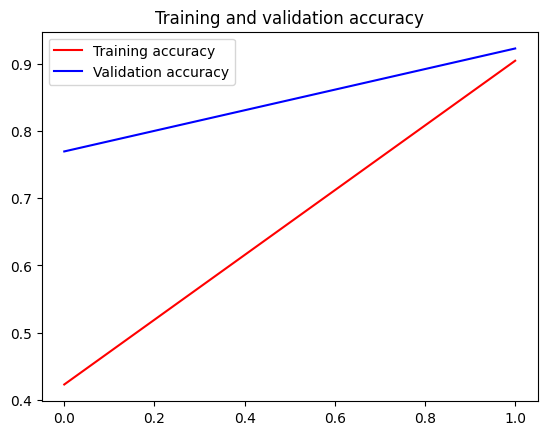

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

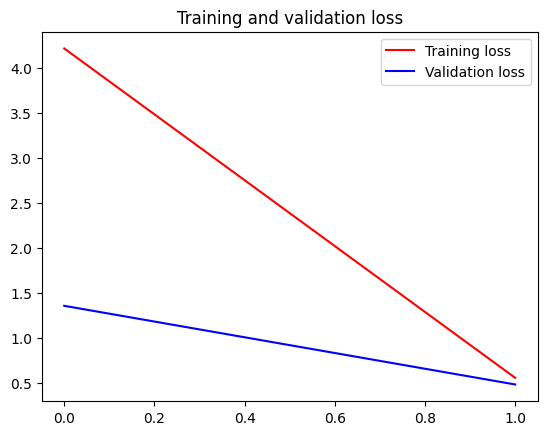

<Figure size 640x480 with 0 Axes>

In [28]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()